In [2]:
library(nflfastR)
library(tidyverse)
library(nflplotR)
library(nflreadr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'nflreadr'


The following objects are masked from 'package:nflfastR':

    load_pbp, load_player_stats




In [3]:
ngs <- load_nextgen_stats(2020:2025)
pbp <- load_pbp(2020:2025)

In [4]:
ngs[ngs$player_display_name == "Bo Nix",]

season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,⋯,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
2024,REG,0,Bo Nix,QB,DEN,2.906322,4.495798,7.386929,-2.8911308,⋯,66.31393,68.88307,-2.5691358,21.31081,68.46401,00-0039732,Bo,Nix,10,B.Nix
2024,REG,1,Bo Nix,QB,DEN,2.842262,2.500385,6.108333,-3.6079487,⋯,61.90476,67.52643,-5.6216667,20.25170,41.76618,00-0039732,Bo,Nix,10,B.Nix
2024,REG,2,Bo Nix,QB,DEN,2.792714,5.628000,9.272647,-3.6446471,⋯,57.14286,66.35314,-9.2102857,21.24923,68.46401,00-0039732,Bo,Nix,10,B.Nix
2024,REG,3,Bo Nix,QB,DEN,2.573833,4.642000,6.865882,-2.2238824,⋯,69.44444,68.57444,0.8700000,21.41622,38.58233,00-0039732,Bo,Nix,10,B.Nix
2024,REG,4,Bo Nix,QB,DEN,3.004280,2.665000,8.909200,-6.2442000,⋯,48.00000,65.94480,-17.9448000,21.88949,48.89427,00-0039732,Bo,Nix,10,B.Nix
2024,REG,5,Bo Nix,QB,DEN,2.834154,3.257895,5.713462,-2.4555668,⋯,70.37037,73.63074,-3.2603704,21.03263,62.21115,00-0039732,Bo,Nix,10,B.Nix
2024,REG,6,Bo Nix,QB,DEN,3.778545,8.514737,10.710000,-2.1952632,⋯,57.57576,63.65697,-6.0812121,23.69251,60.43433,00-0039732,Bo,Nix,10,B.Nix
2024,REG,7,Bo Nix,QB,DEN,3.344000,3.270000,6.617600,-3.3476000,⋯,61.53846,74.00308,-12.4646154,19.70548,36.71859,00-0039732,Bo,Nix,10,B.Nix
2024,REG,8,Bo Nix,QB,DEN,2.979405,6.434643,10.711111,-4.2764683,⋯,75.67568,68.95216,6.7235135,24.08592,61.77777,00-0039732,Bo,Nix,10,B.Nix


In [5]:
ngs |>
    select(avg_time_to_throw, completion_percentage, avg_completed_air_yards, aggressiveness, avg_air_yards_to_sticks) |>
    cor(use = 'complete.obs' )

,avg_time_to_throw,completion_percentage,avg_completed_air_yards,aggressiveness,avg_air_yards_to_sticks
avg_time_to_throw,1.00000000,-0.25273981,0.29115280,0.01031176,0.2949008
completion_percentage,-0.25273981,1.00000000,-0.07501298,-0.28951955,-0.3081462
avg_completed_air_yards,0.29115280,-0.07501298,1.00000000,0.16815850,0.6772320
aggressiveness,0.01031176,-0.28951955,0.16815850,1.00000000,0.2867888
avg_air_yards_to_sticks,0.29490083,-0.30814615,0.67723196,0.28678882,1.0000000


avg_time_to_throw vs completion_percentage = -0.25
 Slight negative relationship. QBs who hold the ball longer tend to complete a slightly lower percentage of passes. Not a strong effect, but suggests efficiency drops with extra time.

avg_time_to_throw vs avg_completed_air_yards = 0.29
Small positive relationship. The longer a QB holds the ball, the more yards downfield they tend to complete passes. Makes sense: deeper routes take longer to develop.

avg_time_to_throw vs aggressiveness = 0.01
Essentially no relationship. Time to throw doesn’t really correlate with whether a QB targets tightly covered receivers.

avg_time_to_throw vs avg_air_yards_to_sticks = 0.29
Small positive relationship. Longer time to throw is linked with throwing slightly past the first-down marker more often. This fits the idea that extended plays allow for routes beyond the sticks.

Overall Takeaway

Holding the ball longer slightly hurts completion % but is positively associated with deeper throws and passes past the sticks.

Aggressiveness is mostly independent of how long a QB holds the ball.

None of these correlations are super strong (all < |0.3|), so these are tendencies, not hard rules.



In [6]:
expected_comp_r <- lm(completion_percentage ~ 1 + avg_time_to_throw, data = ngs)

summary(expected_comp_r)


Call:
lm(formula = completion_percentage ~ 1 + avg_time_to_throw, data = ngs)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.746  -5.550   0.097   5.715  37.463 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        88.8921     1.6370   54.30   <2e-16 ***
avg_time_to_throw  -8.5659     0.5839  -14.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.9 on 3154 degrees of freedom
Multiple R-squared:  0.06388,	Adjusted R-squared:  0.06358 
F-statistic: 215.2 on 1 and 3154 DF,  p-value: < 2.2e-16


Regression Equation

completion_percentage ​= 88.89−8.56×avg_time_to_throw


The intercept (88.89) means that if a QB had an average time to throw of 0 seconds (hypothetical), the model predicts ~88% completion percentage. (Not meaningful in reality, but that’s the baseline reference.)

The slope (-8.56) means that for every additional second a QB holds the ball, their completion percentage decreases by about 8.5 percentage points on average.

In [7]:
ngs <- ngs |>
    mutate(xcomp = residuals(expected_comp_r))

head(ngs$xcomp)

1            2            3            4            5            6 
 0.681635524 -1.625681354 -0.005389755  0.039389987 -0.857980971  5.165871420

In [8]:
xcomp_r <- ngs |>
    group_by(season, player_display_name) |>
    summarize(
        n = n(), 
        xcomp = mean(xcomp)
    ) |>
    arrange(-xcomp) 
    
head(xcomp_r)

`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.


season,player_display_name,n,xcomp
<int>,<chr>,<int>,<dbl>
2024,Joe Milton III,1,18.076779
2024,Marcus Mariota,2,16.277574
2025,Jared Goff,4,14.917032
2025,Brock Purdy,2,11.482325
2024,Jared Goff,19,8.662445
2025,Jalen Hurts,4,8.120339


In [9]:
xcomp_r |>
    arrange(xcomp)

season,player_display_name,n,xcomp
<int>,<chr>,<int>,<dbl>
2021,Jake Fromm,2,-25.55594
2022,Anthony Brown,1,-22.70051
2023,Blaine Gabbert,1,-19.02555
2023,Davis Mills,1,-18.98052
2024,Tim Boyle,1,-17.64552
2023,Brett Rypien,1,-17.55060
2022,Trey Lance,1,-17.26151
2024,Anthony Richardson,10,-16.67074
2021,Brandon Allen,1,-16.22439


In [10]:
plot_data <- xcomp_r |>
    inner_join(ngs, by = c("season", "player_display_name")) 



In [11]:
plot_data_filtered <- plot_data |>
   # filter(player_display_name %in% c("Patrick Mahomes", "Bo Nix", "Geno Smith", "Justin Herbert", "Joe Burrow", "Lamar Jackson", "Aaron Rodgers", "Joe Flacco")) |>
    filter(week == 0) |>
    filter(season == 2025)


In [12]:
plot_data_filtered |>
    select(player_display_name, season, xcomp.x, completion_percentage, avg_time_to_throw)

player_display_name,season,xcomp.x,completion_percentage,avg_time_to_throw
<chr>,<int>,<dbl>,<dbl>,<dbl>
Jared Goff,2025,14.9170325,77.89474,3.047789
Brock Purdy,2025,11.4823253,74.28571,3.045657
Jalen Hurts,2025,8.1203393,71.42857,2.925468
Drake Maye,2025,8.1170553,72.64151,2.700528
Lamar Jackson,2025,7.9773561,72.00000,2.889493
Dak Prescott,2025,6.5315794,71.42857,2.839600
Daniel Jones,2025,5.9665126,71.59091,2.693795
Justin Fields,2025,5.5403526,57.57576,3.305606
Sam Darnold,2025,5.3697128,70.27027,2.703068


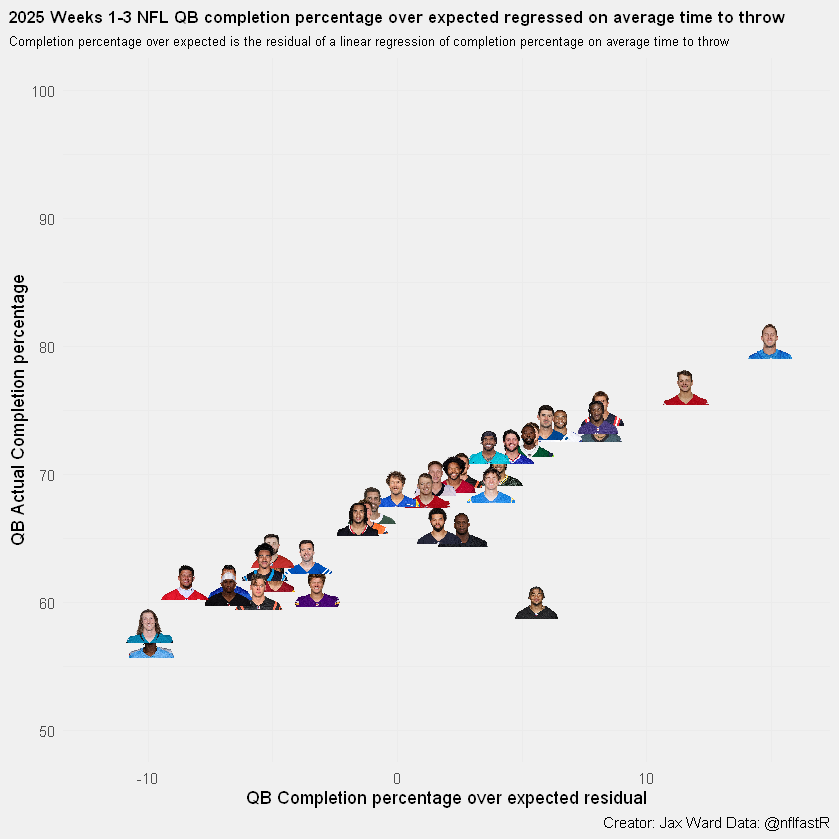

In [16]:
ngs_plot <- ggplot(plot_data_filtered, aes(x = xcomp.x, y = completion_percentage)) +
  geom_nfl_headshots(aes(player_gsis = player_gsis_id), width = 0.075, vjust = 0.45) +
  labs(
    x = "QB Completion percentage over expected residual",
    y = "QB Actual Completion percentage",
    caption = "Creator: Jax Ward Data: @nflfastR",
    title = "2025 Weeks 1-3 NFL QB completion percentage over expected regressed on average time to throw",
    subtitle = "Completion percentage over expected is the residual of a linear regression of completion percentage on average time to throw"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 10),
    plot.subtitle = element_text(size = 8),
    plot.title.position = "plot",
    plot.background = element_rect(fill = "#F0F0F0")
  ) +
  xlim(-12, 16) +
  ylim(50, 100) 

ggsave("ngs_xcomp.png", plot = ngs_plot, width = 16, height = 12, units = "in")

print(ngs_plot)

Conclusion

Looking at the above chart we can see our 8 QBs from the two divisions we have been following. One of the most interesting insights we can see is that Patrick Mahomes despite having the shortest time to throw, has the lowest completion percentage over expected. Why is this the case, since our model predicts that a decrease in time to throw should have a positive relationship with completion percentage? Probably a lot of different reasons, to start with, time to throw is not  strongly correlated to completion percentage and there are a lot of different things that affect completion percentage than just time to throw. Completion percentage also doesn't factor in wide reciever drops or deflected passes both of which the Chiefs offense have struggled with. Other factors that might have an impact on completion percentage like depth of target, wide reciever seperation, and pressure rate are also not accounted for. 

Another interesting case is Lamar Jackson. Jackson at the very top right corner of the chart has the highest completion percentage and the highest completion percentage over expected. Holding the ball for almost three seconds and still completing about 71 perecent of his passes. Based on the above equation we would expect that number to be closer to about 64 percent. I would imagine this is due to two factors. Lamar jackson has not thrown the ball as much this season and has only played 3 games so the sample size is relatively small and on the other hand Lamar is one of the best QBs at throwing on the move and extending the play naturally making his time to throw higher than other QBs.

Other insights into Bo Nix and Joe Flacco might indicate a need to speed up the internal clock and work on anticipation as they had higher time to throws and negative completion percentages over expected.

The Last case I want to highlight is Geno Smith. Smith despite holding the ball for 3.2 seconds on average has a positive completion percentage over expected and a very respectable 63 percent actual completion percentage. This shows Geno Smith accuracy, poise in the pocket, and maybe indicates low aggressiveness. Smith threw 3 interceptions in week 2 and attempted 43 passes and still has a postive completion percentage over expected. I think we can expect Smith going forward to regress positively and bring the completion percentage even higher as he plays more games and his sample size increases.